In [1]:
import numpy as np
from modules.markovChainModule import markovChain
from modules.autocorrelation import autoCorrelation
from modules.constantsAndVectors import hValueses
from modules.utilityFunctions import stackList, powerLaw, plotMomentScaling, stackList
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import pandas as pd

In [2]:
dataPath: str = '/Users/tommaso/Desktop/masterThesis/data/nullH/nullHShortLineagesConverged/'

In [3]:
autoCorrParameters = pd.read_csv(
    dataPath + 'correlationParameters.csv')
markovChain.all = []
markovChain.instantiateFromNpy(
    dataPath + 'timeSerieses.npy', log=True)
meanSizesAtBirth = [instance.meanSizeAtBirth() for instance in markovChain.all]

(1e-05, 21076562.764760222)

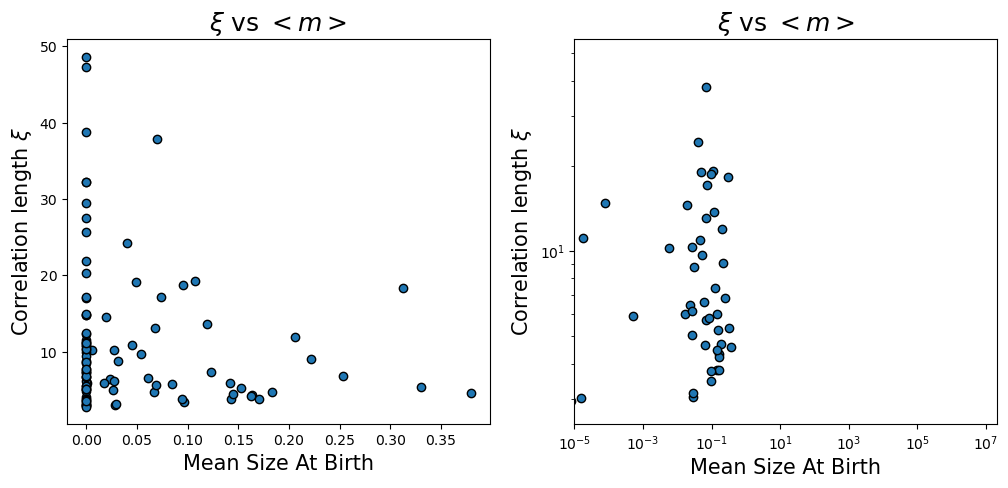

In [4]:
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
for ax, scale in zip(ax_.flatten(), ['linear', 'log']):
    ax.scatter(meanSizesAtBirth,
               autoCorrParameters['correlation'], edgecolor='black')
    ax.set_xlabel('Mean Size At Birth', fontsize=15)
    ax.set_ylabel('Correlation length $\\xi$', fontsize=15)
    ax.set_title('$\\xi$ vs $<m>$', fontsize=18)
    ax.set_xscale(scale)
    _ = ax.set_yscale(scale)

xAxis = np.logspace(-1, -3.5)
#ax_[1].plot(xAxis, powerLaw(xAxis, .2, -2), color='firebrick',
            #linewidth=2.5, label='$slope = -2$ curve')

ax_[1].set_xlim(left = 1e-5)

(0.1, 0.3982546531531481)

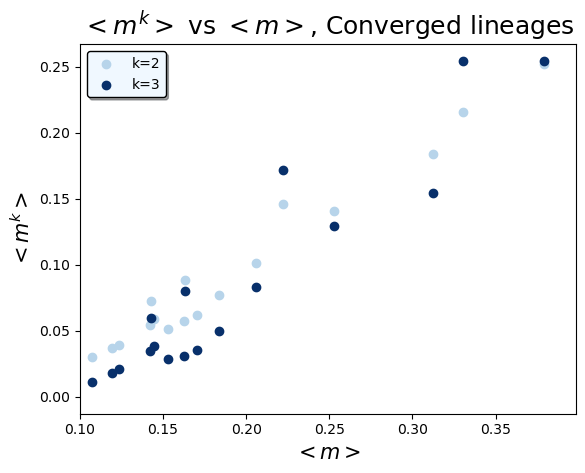

In [5]:
sizesPath = '/Users/tommaso/Desktop/masterThesis/data/nullH/nullHShortLineagesConverged/'
plotMomentScaling(sizesPath=sizesPath,
                  title='$<m^k>$ vs $<m>$, Converged lineages', maxK = 3)
plt.xlim(left = .1)

## Positive H

In [6]:
dataPath = '/Users/tommaso/Desktop/masterThesis/data/positiveH/absorbingHDeltaDecidingShort/'

In [7]:
#np.save('/Users/tommaso/Desktop/masterThesis/data/positiveH/absorbingHDeltaDecidingShort/timeSerieses.npy', tmp[:,-250:])

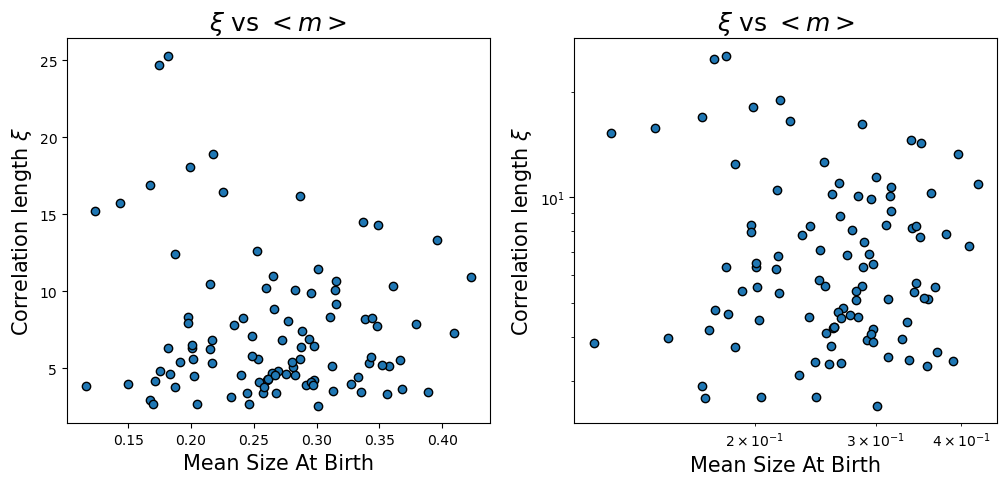

In [8]:
correlationsParameters = pd.read_csv(dataPath + 'correlationParameters.csv')
allMeans = np.load(dataPath + 'allMeans.npy')
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
for ax, scale in zip(ax_.flatten(), ['linear', 'log']):
    ax.scatter(allMeans[0,:],
               correlationsParameters['correlation'], edgecolor='black')
    ax.set_xlabel('Mean Size At Birth', fontsize=15)
    ax.set_ylabel('Correlation length $\\xi$', fontsize=15)
    ax.set_title('$\\xi$ vs $<m>$', fontsize=18)
    ax.set_xscale(scale)
    _ = ax.set_yscale(scale)




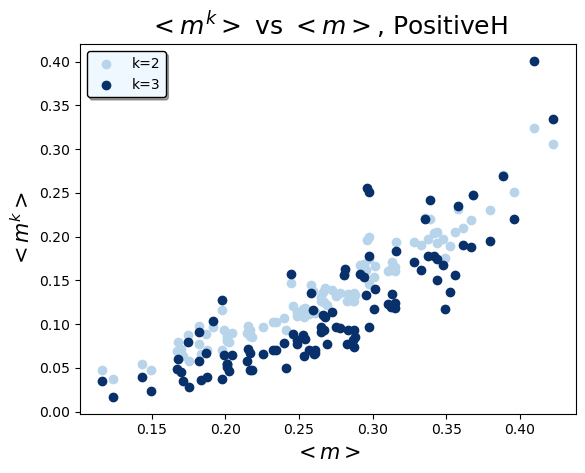

In [9]:
plotMomentScaling(sizesPath=dataPath,
                  title='$<m^k>$ vs $<m>$, PositiveH', maxK = 3)

In [10]:
- np.array([1, 2, 3])

array([-1, -2, -3])

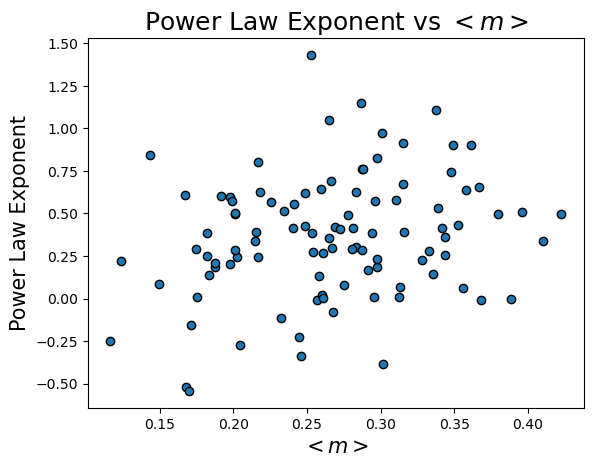

In [63]:
plt.scatter(allMeans[0,:], correlationsParameters['exponent'], edgecolor = 'black')
plt.xlabel('$<m>$', fontsize = 15)
plt.ylabel('Power Law Exponent', fontsize = 15)
_ = plt.title('Power Law Exponent vs $<m>$', fontsize = 18)